# Feature engineering:

The purpose of this notebook is documenting the next stage of the development of an analytical tool for Placetopay

the main purpose is:

* Create new variables: Data enhancement


Here is a propose of new variables:
*  Calculate Measure fields by analysis units:
  *  Number of transactions 
    *  by time / merchant / user
    *  Merchant Number of transactions

  *  Ammount of Time related counts
    *  Merchant number of transactions by hour of day, by day of week, and across all time
    *  User time since last purchase, 

  *  Ammount of purchase
    *  Purchase aggregations by merchant / user / time
    *  Purchases by time


*  Create new variables: 
  *  Merchant age, 
  *  Merchant types of products
  *  Merchant average transaction purchase
  *  Transaction day of the week
  *  Transaction Latitude and Longitude for compute User Distance to physical address of merchant
  *  Transaction description cleaned and processed into categories
    *  Group same descriptions together. 
    *  Tokenizing descriptions and define meta descriptors 
    *  Count-based representations -> word-document co-occurrence matrices
    *  Word embeddings
  *  For each category of transaction description (Product):
    *  We can calculate an average purchase price
    *  We can associate time dependante trends
    *  We can do the same, but aggregating across merchants
  *  How we can use existing public data to help interpolate missing columns or values?
  *  What other stuff I cant see?





## Load database

In [1]:
#REquired libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# To load a file into colab:
import io
import os
from datetime import datetime

# For the plots:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import plotly.graph_objs as go
import time

In [ ]:
#!pip install dovpanda
#import dovpanda

In [ ]:
# Making lists of columns for further use:

HashedCols = ['transaction_payer_id', 'card_id']

DateCols = ['transaction_processing_date_', 'merchant_created']

IntCols = ['transaction_processing_hour', 'transaction_card_installments']

FloatCols = ['transaction_processing_amount']

CategoricalCols = ['transaction_request_language', 'transaction_response_code',
                   'transaction_card_issuer_name', 'transaction_card_type', 
                   'transaction_payer_document_type', 
                   'paymentmethod_franchise',  'paymentmethod_name', 'paymentmethod_type',
                   'ip_location_region_name', 'ip_location_city', 
                   'card_class', 'card_country', 
                   'merchant_id', 'merchant_enabled', 
                   'merchant_address_city', 'merchant_classification', 
                   'isic_division_name', 'isic_section_name',
                   'site_category', 'site_id', 'site_channel']

All_cols = HashedCols + FloatCols + DateCols + IntCols + CategoricalCols + [
                'transaction_user_agent', 'transaction_id', 'transaction_description']
len(All_cols)

31

### Pickle Files into Jupyter


In [ ]:
%%time
# To save as Pickle format:
bdf.to_pickle("./placetopayDB3_pickle")

In [ ]:
%%time
#And then when you need to restart your notebook you can simply read directly from pickle:
bd = pd.read_pickle("./placetopayDB3_pickle")
# If the file is very large the pickle file will be compressed with the parameter compression = 'gzip'.

### Pickle files into Google Drive:

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
DATA_PATH = "/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_pickle"
infile = open(DATA_PATH,'rb')
bd = pickle.load(infile)
bd.shape

CPU times: user 7.32 s, sys: 4.49 s, total: 11.8 s
Wall time: 20 s


### CSV into jupyter from local folder:

In [ ]:
cd ../Inferencia y recomendacion - EGM

/home/jovyan/work/PROJECT/Inferencia y recomendacion - EGM


In [ ]:
ls

 1-Documentos/                   'Copy of Team67_Project_Week5.ipynb'
'2-Deliverable Documents Sent'/   EDA.ipynb
'3- EDA Notebooks'/               merchants.csv
'4-Similarity Matrix'/            merchants.gsheet
'Base Limpia .ipynb'              payers.csv
 bdfn.csv                         payers.gsheet
 bdfnv2.csv                       placetopayDB3.ftr
'Borrador - LuisM.ipynb'          PlaceToPayEDA.html


In [ ]:
%%time
FileName = 'placetopayDB3.csv'
from csv import reader
opened_file = open(FileName) # File path if it fails it might be necessary to add encoding = "utf-8"
read_file = reader(opened_file,delimiter=',')
read_file

In [ ]:
Sample = pd.read_csv( FileName, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

### CSV into colab from Google Drive:

In [2]:
# Para usar Google Drive, (Solo si se ejecuta desde Google Drive):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Mounted at /content/drive


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3a/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
Sample = pd.read_csv(FilePath, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Sample.shape

In [ ]:
%%time
# Load the database to start exploratory analysis:
#FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_sample.csv'

DataChunk = pd.read_csv(FilePath, chunksize=100000, sep=',', encoding='utf-8')#, usecols = All_cols) 
dfList = []
for chunk in DataChunk:
    df = pd.DataFrame(chunk)
    dfList.append(df)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe

(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
CPU times: user 10.3 s, sys: 947 ms, total: 11.2 s
Wall time: 16.2 s


### Feather file into Jupyter

In [ ]:
%%time
import feather
FeatherFileName = '/placetopayDB3.ftr'

# To read feather-format:
bd = pd.read_feather(FeatherFilePath + FeatherFileName, columns=None, use_threads=True)
#bd = feather.read_dataframe(FilePath) # do the same, alternatively

In [ ]:
# Load the database to start exploratory analysis:
%%time
FileName = 'placetopayDB3.csv'
ChunkSize = 10 ** 5

#https://pythonspeed.com/articles/chunking-pandas/
#for chunk in pd.read_csv(FileName, chunksize=ChunkSize):
#    process(chunk)

DataChunk = pd.read_csv(FileName, chunksize=100000, sep=',', encoding='utf-8', usecols = chosen_cols) 
dfList = []
for chunk in DataChunk:
    dfList.append(chunk)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe



---



---



# Introduction

In [ ]:
# What type of payment methods do we want to include in study?
bd.paymentmethod_type.value_counts()

DEBITACCOUNT    6323677
CREDITCARD      3099349
PRIVATECARD      315443
CASH                310
E-WALLET             20
Name: paymentmethod_type, dtype: int64

In [ ]:
# Do we need to consider only approved transactions?
bd.transaction_response_code.value_counts()

APPROVED    7028504
REJECTED    2548665
FAILED       161556
PENDING          74
Name: transaction_response_code, dtype: int64

In [ ]:
bd.drop(bd[bd['transaction_response_code']!='APPROVED'].index, axis = 0, inplace=True)

In [ ]:
# Do we need to consider only approved transactions?
bd.site_category.value_counts()

Recaudo       5097102
E-Commerce    1931402
Name: site_category, dtype: int64

In [ ]:
bd.drop(bd[bd['site_category']!='E-Commerce'].index, axis = 0, inplace=True)

In [ ]:
bd.shape

(9738799, 32)

In [ ]:
import re
def Clean_chars(Name): 
    #print(type(Name), Name)
    Name = str(Name)
    Name = re.sub('[^a-zA-Z0-9?]','',Name)
    #Name = Name.replace("'",  r"-")
    #Name = Name.replace('"',  r"-")
    #Name = Name.replace("\\", r"-")
    #Name = Name.replace("`",  r"~")
    #Name = Name.replace(" ",  r"_")
    #Name = Name.replace(";",  r".")
    #Name = Name.replace(",",  r".")                           
    #Name = Name.replace(",",'dd')
    #Name = Name.replace(' ','_').lstrip().rstrip()
    return Name

In [ ]:
bd['transaction_payer_id'] = bd['transaction_payer_id'].apply(Clean_chars).str.slice(start=0, stop=10, step=None)
bd['transaction_payer_id'] = bd['transaction_payer_id'].replace("nan",np.NaN)

In [ ]:
# to create a new merchant category for the business in costarica...
CR_index = bd[bd['isic_section_name'].isna()].index
bd['isic_division_name'] = bd['isic_division_name'].astype(str)
bd.loc[CR_index, 'isic_division_name'] = 'Costa Rica'
bd['isic_section_name'] = bd['isic_section_name'].astype(str)
bd.loc[CR_index, 'isic_section_name'] = 'Costa Rica'

In [ ]:
bd['ip_location_city'] = bd['ip_location_city'].astype(str)
bd['ip_location_region_name'] = bd['ip_location_region_name'].astype(str)
bd['card_issuer_country'] = bd['card_issuer_country'].astype(str)
bd['merchant_address_city'] = bd['merchant_address_city'].astype(str)

In [ ]:
bd.loc[bd[bd['ip_location_city']=='Santiago De Cali'].index , 'ip_location_city'] = 'Cali'

In [ ]:
bd['month'] = pd.DatetimeIndex(bd['transaction_processing_date_']).month


## Logarithm of Transaction Amount

In [ ]:
# Here we will start working with a logarithmic transformation of the transaction amount.
bd_log = bd.copy()
bd_log.transaction_processing_amount = np.log(bd_log.transaction_processing_amount+1)

# 2- Exploring trends

## Temporal trends

We could use a line plot that shows purchases by day. using multiple lines, one for each user, with the hope of detecting visible trends and possible clusters of users with similar behavior. Such plots are one example of parallel coordinates plots.

In [ ]:
bd['weekday'] = pd.to_datetime(bd['transaction_processing_date_']).dt.day_name()
bd['week'] = pd.DatetimeIndex(bd['transaction_processing_date_']).week # DatetimeIndex.isocalendar().week   or  pd.Int64Index(idx.isocalendar().week)
bd['month'] = pd.DatetimeIndex(bd['transaction_processing_date_']).month
bd['year'] = pd.DatetimeIndex(bd['transaction_processing_date_']).year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



#### No. of transaction by day of the week

In [ ]:
bd_weekday = bd.groupby(by=["weekday","month"],as_index=False)["transaction_payer_id"].count()
fig = px.line(bd_weekday, x="month", y="transaction_payer_id",color="weekday",
            labels={"weekday":"Week Day","transaction_payer_id":"Number of transactions", "month":"Month"})
fig.update_traces(mode="markers+lines")
fig.show()

In [ ]:
# Hours when people make transactions, comparing different days of the week:

bd_weekday = bd_log.groupby(by=["weekday","transaction_processing_hour"],as_index=False)["transaction_payer_id"].count()
fig = px.line(bd_weekday, x="transaction_processing_hour", y="transaction_payer_id",color="weekday",
            labels={"weekday":"Week Day","transaction_payer_id":"Number of transactions", "transaction_processing_hour":"Hour"})
fig.update_traces(mode="markers+lines")
fig.show()

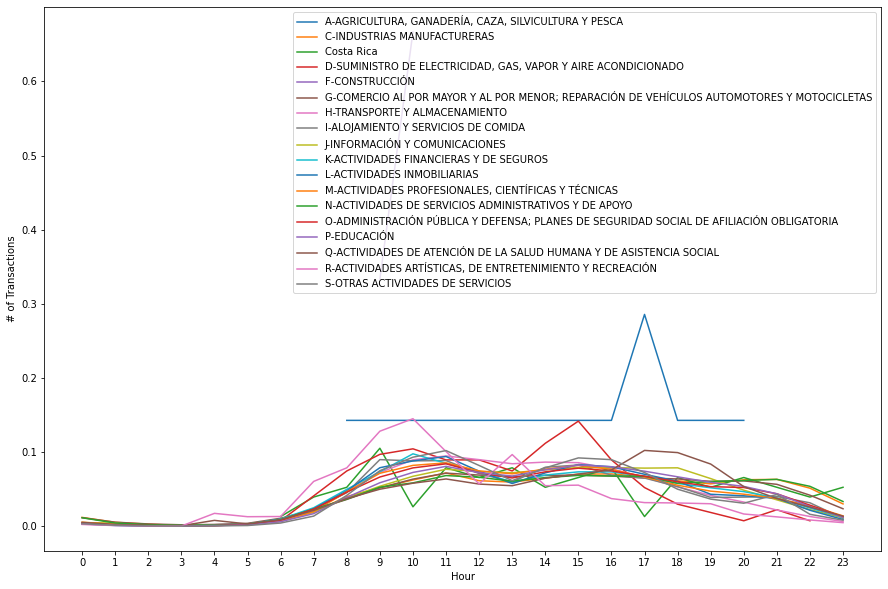

In [ ]:
# This is a normalized time series of transactions segregated by business sector (merchant Category/Section)

bd_hour = bd_log.groupby(by=["isic_section_name","transaction_processing_hour"],as_index=False)["transaction_payer_id"].count()
#bd_hour['isic_section_name'] = bd_hour['isic_section_name'].astype(str)

#fig = px.line(bd_hour, x="transaction_processing_hour", y="transaction_payer_id",color="isic_section_name",
#            labels={"isic_section_name":"merchant Category","transaction_payer_id":"Number of transactions", "transaction_processing_hour":"Hour"})
#fig.update_traces(mode="markers+lines")
#fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
#fig.show()

plt.figure(figsize=(15, 10))
for section in bd_hour['isic_section_name'].unique():
    plt.plot(bd_hour["transaction_processing_hour"][bd_hour['isic_section_name']==section],
             bd_hour['transaction_payer_id'][bd_hour['isic_section_name']==section]/bd_hour['transaction_payer_id'][bd_hour['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Hour')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(0, 24, 1))
plt.legend(loc = 'upper right') 
plt.show()

From this trends we can see that the customers use to pay Social Assistance and Health fees and obligations in the afternoon

Also, we can see that there are a substancial amount of transactions that are recorded into obligatory services like Social Security Contributions, Insurance services and property rental.

We can aventure to say that the hour is not an important variable into determining the merchant category of the purchase decition of the customer.\

Interestingly, the transactions recorded in Costa rica have a different pattern: they spike early at 8 Am, and spike negatively at the hours when other categories have more frequency. A possible explanation is that Costa Rica transactions are mainly in hotels.

### No. of transactions over time

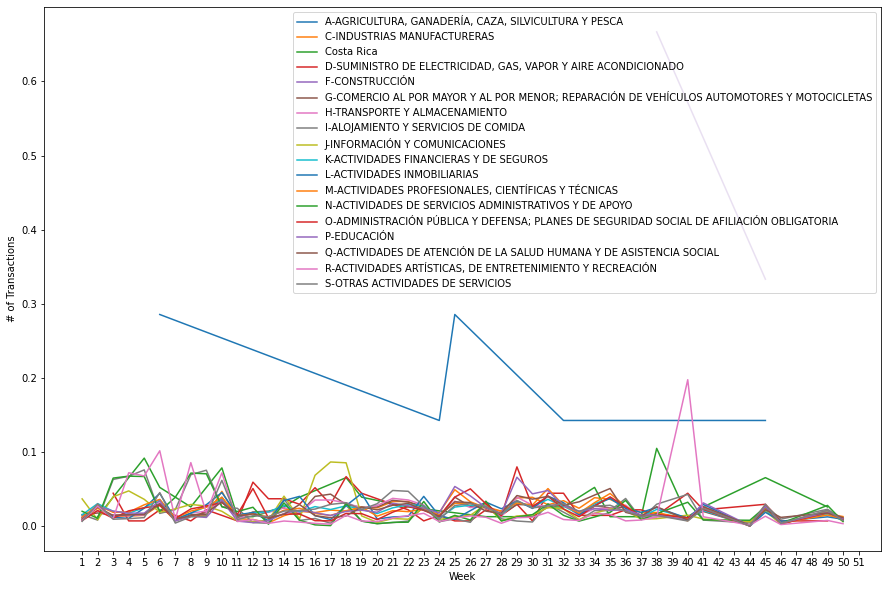

In [ ]:
# Normalized time series of Number of transactions as a fraction of the total, aggregated over the week, separated by business sector

bd_time = bd_log.groupby(by=["isic_section_name","week"],as_index=False)["transaction_payer_id"].count()

plt.figure(figsize=(15, 10))
for section in bd_time['isic_section_name'].unique():
    plt.plot(bd_time["week"][bd_time['isic_section_name']==section],
             bd_time['transaction_payer_id'][bd_time['isic_section_name']==section]/bd_time['transaction_payer_id'][bd_time['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Week')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(1, 52, 1))
plt.legend(loc = 'upper right') 
plt.show()

In [ ]:
# Number of transactions by week, by merchant category

bd_week = bd.groupby(by=["isic_section_name", 'week'],as_index=False)["transaction_id"].count()
fig = px.line(bd_week, x="week", y="transaction_id",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_id":"Number of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

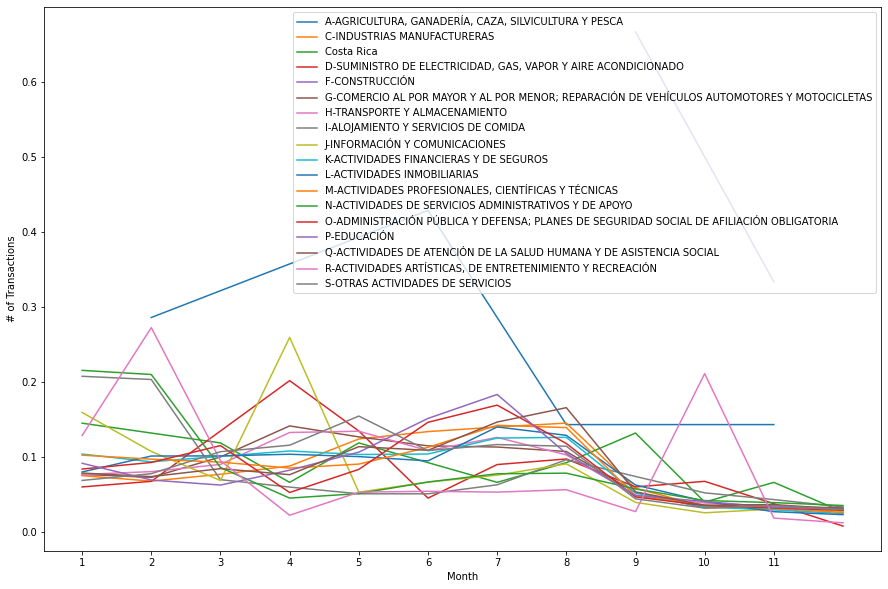

In [ ]:
# Normalized time series of Number of transactions as a fraction of the total, aggregated over the month, separated by business sector

bd_time = bd_log.groupby(by=["isic_section_name","month"],as_index=False)["transaction_payer_id"].count()

plt.figure(figsize=(15, 10))
for section in bd_time['isic_section_name'].unique():
    plt.plot(bd_time["month"][bd_time['isic_section_name']==section],
             bd_time['transaction_payer_id'][bd_time['isic_section_name']==section]/bd_time['transaction_payer_id'][bd_time['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Month')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(1, 12, 1))
plt.legend(loc = 'upper right') 
plt.show()

In [ ]:
# Number of transactions by month, by merchant category

bd_month = bd.groupby(by=["isic_section_name","month"],as_index=False)["transaction_payer_id"].count()
fig = px.line(bd_month, x="month", y="transaction_payer_id",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","month":"Month","transaction_payer_id":"Number of transactions"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()


### Amount of transactions over time

In [ ]:
# Amount of transactions over time, calculated each day, per merchant category

bd_week = bd.groupby(by=["isic_section_name", 'transaction_processing_date_'],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_week, x="transaction_processing_date_, y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_processing_amount":"Aggregated Amount of transactions", "transaction_processing_date_":"Date"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"}
                  )
fig.show()

In [ ]:
# Amount of transactions by week, by merchant category

bd_week = bd.groupby(by=["isic_section_name", 'week'],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_week, x="week", y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_processing_amount":"Aggregated Amount of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50,"b":100},"legend_orientation":"h"}
                  )
fig.show()

In [ ]:
# Aggregated value of transactions by month, by merchant category

bd_month = bd.groupby(by=["isic_section_name","month"],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_month, x="month", y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","month":"Month","transaction_processing_amount":"Aggregated Value of transactions"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

## Temporal trends after Filtering only E-commerce

#### No. of transaction by hour by day of the week


In [ ]:
# Hours when people make transactions, comparing different days of the week:

bd_weekday = bd.groupby(by=["weekday","transaction_processing_hour"],as_index=False)["transaction_payer_id"].count()
fig = px.line(bd_weekday, x="transaction_processing_hour", y="transaction_payer_id",color="weekday",
            labels={"weekday":"Week Day","transaction_payer_id":"Number of transactions", "transaction_processing_hour":"Hour"})
fig.update_traces(mode="markers+lines")
fig.show()

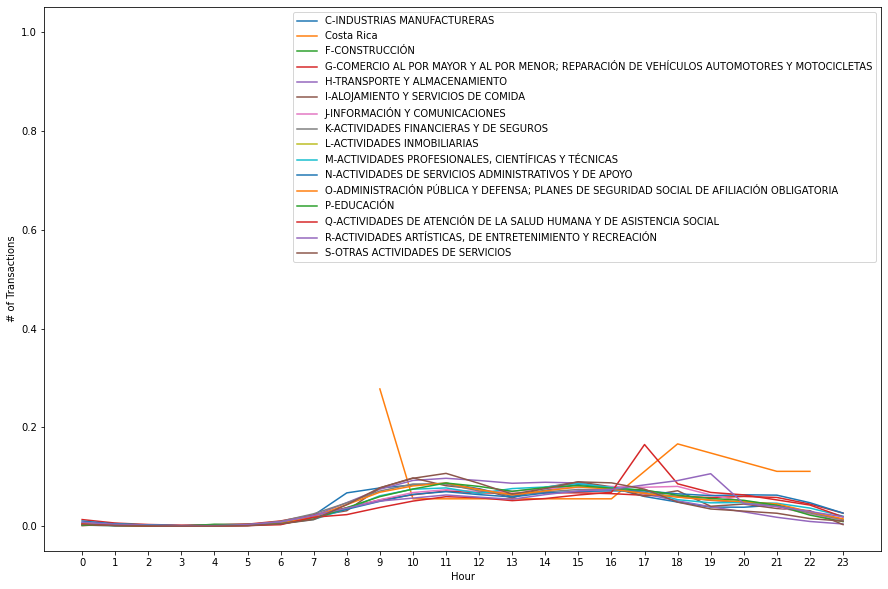

In [ ]:
# This is a normalized time series of transactions segregated by business sector (merchant Category/Section)

bd_hour = bd_log.groupby(by=["isic_section_name","transaction_processing_hour"],as_index=False)["transaction_payer_id"].count()
#bd_hour['isic_section_name'] = bd_hour['isic_section_name'].astype(str)

#fig = px.line(bd_hour, x="transaction_processing_hour", y="transaction_payer_id",color="isic_section_name",
#            labels={"isic_section_name":"merchant Category","transaction_payer_id":"Number of transactions", "transaction_processing_hour":"Hour"})
#fig.update_traces(mode="markers+lines")
#fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
#fig.show()

plt.figure(figsize=(15, 10))
for section in bd_hour['isic_section_name'].unique():
    plt.plot(bd_hour["transaction_processing_hour"][bd_hour['isic_section_name']==section],
             bd_hour['transaction_payer_id'][bd_hour['isic_section_name']==section]/bd_hour['transaction_payer_id'][bd_hour['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Hour')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(0, 24, 1))
plt.legend(loc = 'upper right') 
plt.show()

From this trends we can see that the customers use to pay Social Assistance and Health fees and obligations in the afternoon

Also, we can see that there are a substancial amount of transactions that are recorded into obligatory services like Social Security Contributions, Insurance services and property rental.

We can aventure to say that the hour is not an important variable into determining the merchant category of the purchase decition of the customer.

### No. of transactions over time

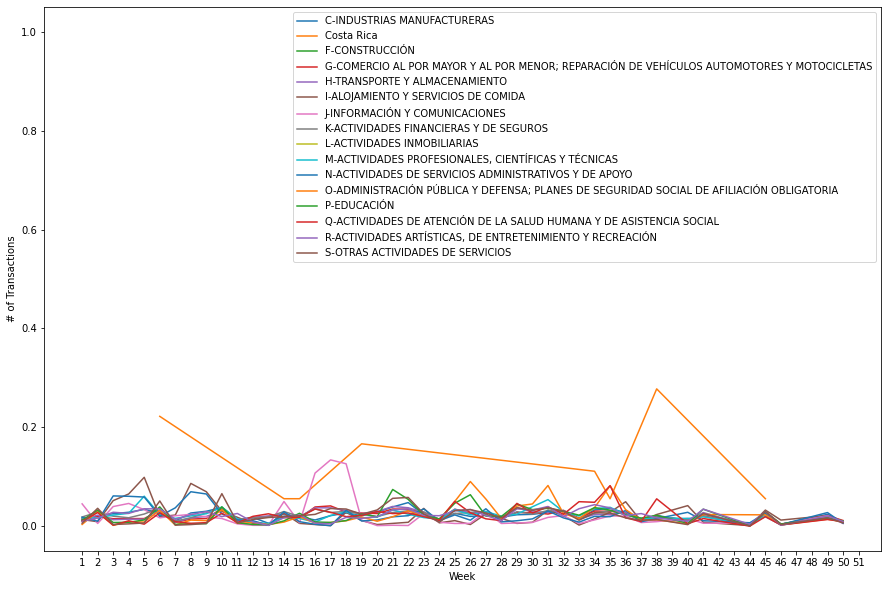

In [ ]:
# Normalized time series of Number of transactions as a fraction of the total, aggregated over the week, separated by business sector

bd_time = bd.groupby(by=["isic_section_name","week"],as_index=False)["transaction_payer_id"].count()

plt.figure(figsize=(15, 10))
for section in bd_time['isic_section_name'].unique():
    plt.plot(bd_time["week"][bd_time['isic_section_name']==section],
             bd_time['transaction_payer_id'][bd_time['isic_section_name']==section]/bd_time['transaction_payer_id'][bd_time['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Week')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(1, 52, 1))
plt.legend(loc = 'upper right') 
plt.show()

In [ ]:
# Number of transactions by week, by merchant category

bd_week = bd.groupby(by=["isic_section_name", 'week'],as_index=False)["transaction_id"].count()
fig = px.line(bd_week, x="week", y="transaction_id",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_id":"Number of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

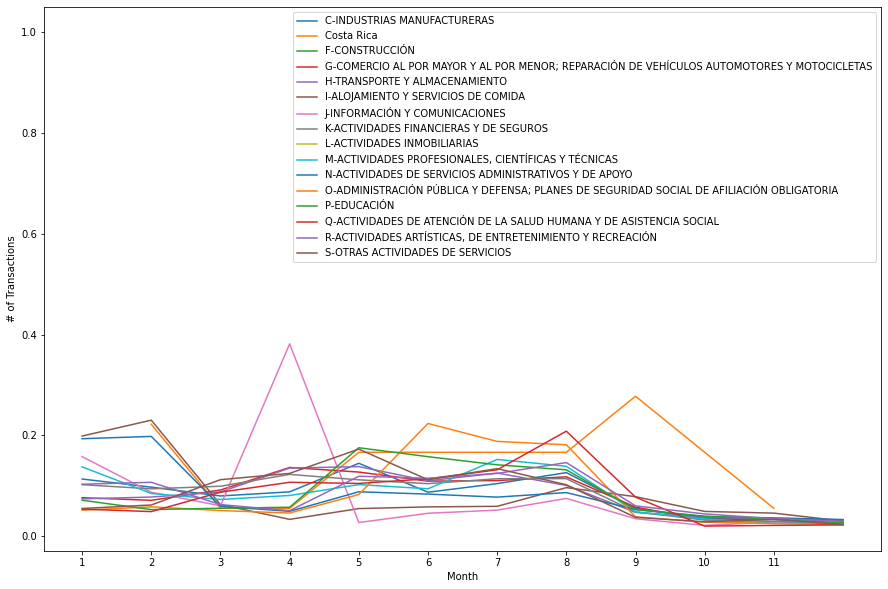

In [ ]:
# Normalized time series of Number of transactions as a fraction of the total, aggregated over the month, separated by business sector

bd_time = bd.groupby(by=["isic_section_name","month"],as_index=False)["transaction_payer_id"].count()

plt.figure(figsize=(15, 10))
for section in bd_time['isic_section_name'].unique():
    plt.plot(bd_time["month"][bd_time['isic_section_name']==section],
             bd_time['transaction_payer_id'][bd_time['isic_section_name']==section]/bd_time['transaction_payer_id'][bd_time['isic_section_name']==section].sum(), 
             label=section)
plt.xlabel('Month')
plt.ylabel('# of Transactions')
plt.xticks(np.arange(1, 12, 1))
plt.legend(loc = 'upper right') 
plt.show()

In [ ]:
# Number of transactions by month, by merchant category

bd_month = bd.groupby(by=["isic_section_name","month"],as_index=False)["transaction_payer_id"].count()
fig = px.line(bd_month, x="month", y="transaction_payer_id",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","month":"Month","transaction_payer_id":"Number of transactions"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()


### Amount of transactions over time

In [ ]:
# Amount of transactions over time, calculated each day, per merchant category

bd_week = bd.groupby(by=["isic_section_name", 'transaction_processing_date_'],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_week, x="transaction_processing_date_, y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_processing_amount":"Aggregated Amount of transactions", "transaction_processing_date_":"Date"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"}
                  )
fig.show()

In [ ]:
# Amount of transactions by week, by merchant category

bd_week = bd.groupby(by=["isic_section_name", 'week'],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_week, x="week", y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","transaction_processing_amount":"Aggregated Amount of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50,"b":100},"legend_orientation":"h"}
                  )
fig.show()

In [ ]:
# Aggregated value of transactions by month, by merchant category

bd_month = bd.groupby(by=["isic_section_name","month"],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_month, x="month", y="transaction_processing_amount",color="isic_section_name",
            labels={"isic_section_name":"Merchant Category","month":"Month","transaction_processing_amount":"Aggregated Value of transactions"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

We can see from this plots that sometimes there is not a linear proportion between Number of transactions and aggregated amount of money in those transactions. In particular in the case of the Entertainment section and Education sector.

## Interactions and Effects

# 3- Feature Engineering



### New Columns created


## Payer / User Attributes

In [ ]:
# Creating new variables that describe the customers behavior.

PayerAge = bd[(bd['transaction_processing_amount']!=0) & (bd['transaction_response_code']=='APPROVED')][['transaction_id', 'transaction_payer_id']].groupby(['transaction_payer_id']).count()

In [ ]:
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_processing_amount"]].groupby(['transaction_payer_id']).sum(),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_processing_amount"]].groupby(['transaction_payer_id']).mean(),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')

In [ ]:
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_processing_date_"]].groupby(['transaction_payer_id']).agg('first'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_processing_date_"]].groupby(['transaction_payer_id']).agg('last'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')


In [ ]:
PayerAge.rename(columns = {'transaction_id': 'Purchases',
                           'transaction_processing_date__x':'FirstPurchase', 
                           'transaction_processing_date__y':'LastPurchase',
                           'transaction_processing_amount_x': 'TotalSpent',
                           'transaction_processing_amount_y': 'AvgSpent'}, inplace = True)
PayerAge['recency'] = abs(pd.to_datetime('2020-09-20 00:00:00')- PayerAge['LastPurchase'])
PayerAge['frequency'] = abs(PayerAge['LastPurchase']- PayerAge['FirstPurchase'])/PayerAge['Purchases']

In [ ]:
# convert variable to integer and convert number of seconds to days
PayerAge['frequency'] = (PayerAge['frequency']).astype(int)/8.64e+13
PayerAge['recency'] = PayerAge['recency'].astype(int)/8.64e+13

In [ ]:
PayerAge.head(20)

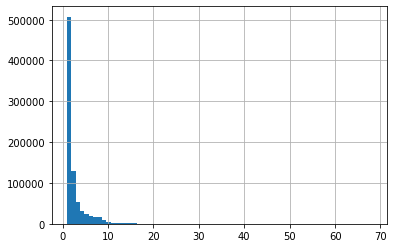

In [ ]:
#Majority of payers do only one purchase: the rest are following this distribution:
PayerAge['Purchases'].hist(bins = 70)

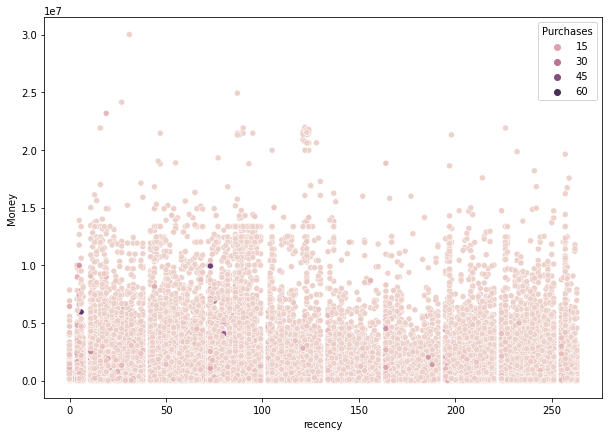

In [ ]:
#scatterplot of Age of Payer Users vs Transaction Amount (Color is Number of Transactions):
#PayerAge = PayerAge.replace(np.NaN,0)
plt.figure(figsize=(10,7))
sns.scatterplot(x= PayerAge['recency'], y = PayerAge['AvgSpent'], hue = PayerAge['Purchases'])
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



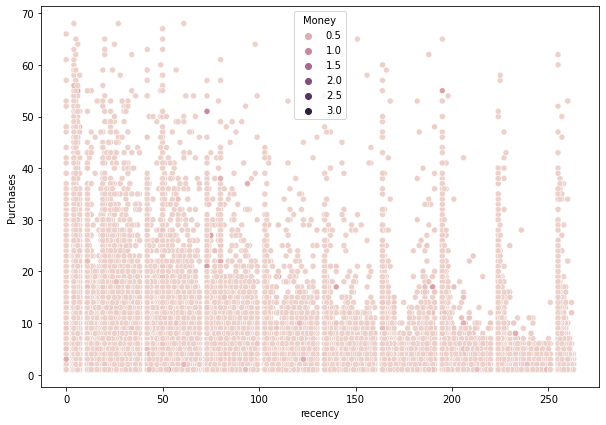

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= PayerAge['recency'], y = PayerAge['Purchases'], hue = PayerAge['AvgSpent'])
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



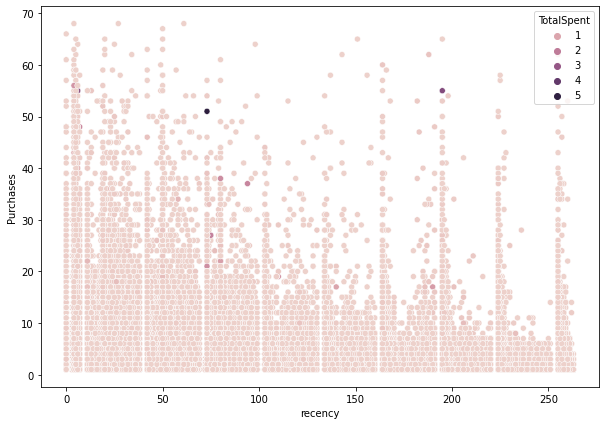

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= PayerAge['recency'], y = PayerAge['Purchases'], hue = PayerAge['TotalSpent'])
plt.show()

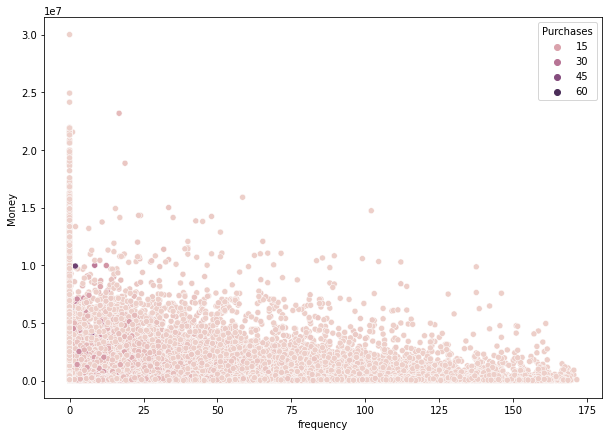

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= PayerAge['frequency'], y = PayerAge['AvgSpent'], hue = PayerAge['Purchases'])
plt.show()

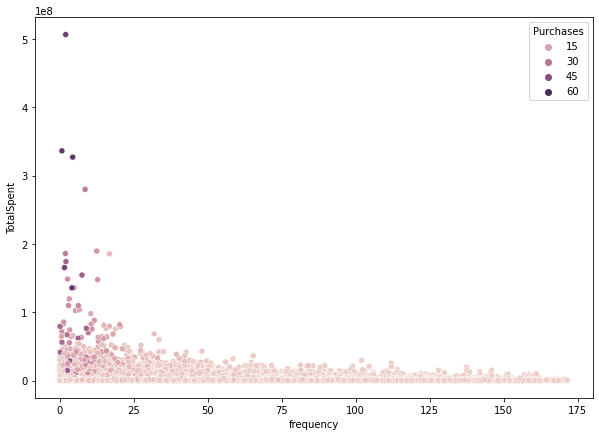

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= PayerAge['frequency'], y = PayerAge['TotalSpent'], hue = PayerAge['Purchases'])
plt.show()

In [ ]:
# Adding the rest of the attributes to each payer_id. Here we use 'last' attribute for the function, but it is also possible to use a mode (more frequent)
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_payer_document_type"]].groupby(['transaction_payer_id']).agg('first'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "ip_location_region_name"]].groupby(['transaction_payer_id']).agg('last'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "ip_location_city"]].groupby(['transaction_payer_id']).agg('last'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')
PayerAge = pd.merge(PayerAge, 
                    bd[['transaction_payer_id', "transaction_user_agent"]].groupby(['transaction_payer_id']).agg('last'),
                    how="left", left_on='transaction_payer_id',right_on='transaction_payer_id')

In [ ]:
PayerAge = PayerAge.reset_index()
PayerAge['transaction_payer_id'] = PayerAge['transaction_payer_id'].apply(Clean_chars).str.slice(start=0, stop=10, step=None)
PayerAge

transaction_payer_id  Purchases  ...  ip_location_city  transaction_user_agent
0                 AC01SW14B5          1  ...            Bogota                     NaN
1                 ABK9YOCHAS          1  ...            Bogota                     NaN
2                 A1S6?16335          3  ...            Bogota                     NaN
3                 ASEK3QVUIL          2  ...            Bogota                     NaN
4                 A7F8LGO9YQ          1  ...           Pereira                     NaN
...                      ...        ...  ...               ...                     ...
2430944           PPQU1UUX61          2  ...            Bogota                     NaN
2430945           PJAS6R7AFX          1  ...            Ibague                     NaN
2430946           P9AK57IH1E          2  ...            Bogota                     NaN
2430947           PTP546FBH1          2  ...            Bogota                     NaN
2430948           P91N8BGGGZ          1  ...            Bogota                     NaN

[2430949 rows x 12 columns]

In [ ]:
PayerAge['transaction_payer_document_type'] = PayerAge['transaction_payer_document_type'].astype(str)
PayerAge['ip_location_region_name'] = PayerAge['ip_location_region_name'].astype(str)
PayerAge['ip_location_city'] = PayerAge['ip_location_city'].astype(str)
PayerAge['transaction_user_agent'] = PayerAge['transaction_user_agent'].astype(str)
PayerAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430949 entries, 0 to 2430948
Data columns (total 12 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   transaction_payer_id             object        
 1   Purchases                        int64         
 2   TotalSpent                       float64       
 3   Money                            float64       
 4   FirstPurchase                    datetime64[ns]
 5   LastPurchase                     datetime64[ns]
 6   recency                          float64       
 7   frequency                        float64       
 8   transaction_payer_document_type  object        
 9   ip_location_region_name          object        
 10  ip_location_city                 object        
 11  transaction_user_agent           object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 222.6+ MB


In [ ]:
PayerAge = PayerAge.replace('nan', 'No Info')
PayerAge

In [ ]:
# Function to classify the devices 
# the order of the lines in the function is defined by the probability of each word to appear, ascendently

import re
def Clean_Devices(Name): 
  Name = str(Name)
  if re.search(r'iPad', Name):
    return 'iPad'
  elif re.search(r'Macintosh', Name):
    if re.search(r'Chrome/\d{2}.\d.*', Name):
      return 'Macintosh Chrome'
    elif re.search(r'Safari/\d{3}.\d{2}.*', Name):
      return 'Macintosh Safari'
    else:
      return 'Macintosh Other'
  elif re.search(r'iPhone', Name):
    return 'iPhone'
  elif re.search(r'Linux', Name):
    if re.search(r'Android .*', Name):
      if re.search(r'Chrome/\d{2}.\d.*', Name):
        return 'Linux Android Chrome'
      elif re.search(r'Firefox/', Name):
        return 'Linux Android Firefox'
      else:
        return 'Linux Android Other'
    else:
      return 'Linux Other'
  elif re.search(r'Android', Name):
    return 'Linux Android'
  elif re.search(r'Windows', Name):
    if re.search(r'Firefox/\d{2}.\d.*', Name):
      return 'Windows Firefox'
    elif re.search(r'Chrome/\d{2}.\d.*', Name):
      return 'Windows Chrome'
    else:
      return 'Windows Other'
  else:
    return 'Other' #Name

In [ ]:
PayerAge['transaction_user_agent'] = PayerAge['transaction_user_agent'].apply(Clean_Devices)

In [ ]:
PayerAge['transaction_user_agent'].value_counts().head(30)

Windows Chrome          1137513
Other                    457772
Linux Android Chrome     455369
iPhone                   162566
Macintosh Chrome          79264
Windows Firefox           53490
Macintosh                 51775
Linux Other               21059
iPad                       5397
Windows                    5290
Linux Android              1392
Macintosh Safari             62
Name: transaction_user_agent, dtype: int64

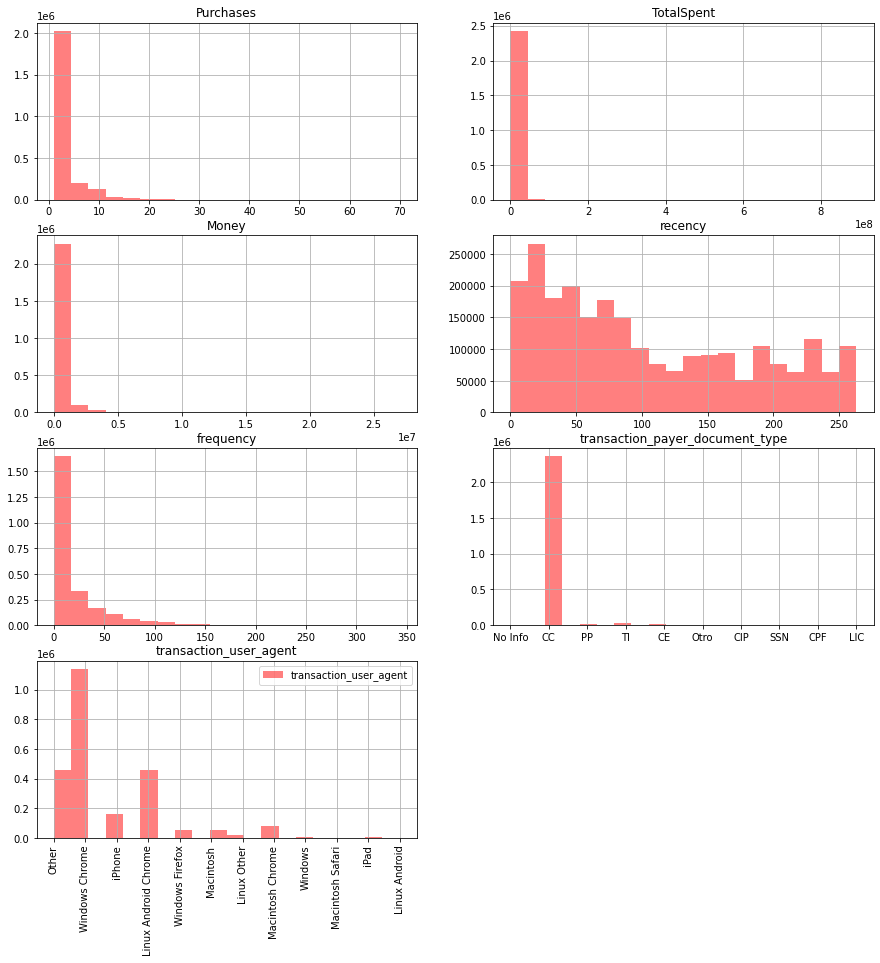

In [ ]:
#Frequency distributions of each new attributes of payers

plt.figure(figsize=(15,15))
for i, column in enumerate(['Purchases', 'TotalSpent', 'AvgSpent', 'recency', 'frequency', 'transaction_payer_document_type', 'transaction_user_agent']):
  plt.subplot(4, 2, i+1)
  PayerAge[column].hist(bins = 20, alpha = 0.5, color = 'r' , label = column).set_title(column)

  if column == 'transaction_user_agent':
    plt.xticks(rotation=90)

plt.legend()
plt.show()


## Merchant Attributes

In [ ]:
# how old are the merchants?

agg_dict = {c: 'count' if c in ['transaction_id'] else 'last' for c in ['merchant_created']}
MerchAge = bd[["merchant_id", 'merchant_created']].groupby(['merchant_id']).agg(agg_dict)

In [ ]:
MerchAge['Age'] = (pd.to_datetime('2020/9/20') - pd.to_datetime(MerchAge['merchant_created']))
MerchAge['Age'] = MerchAge['Age'].dt.days

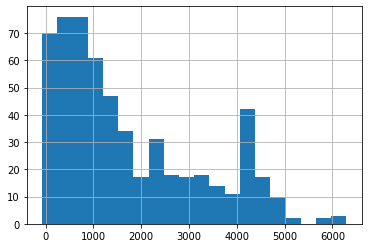

In [ ]:
MerchAge['Age'].hist(bins = 20)

In [ ]:
MerchAge = pd.merge(MerchAge, 
                    bd[['transaction_id', "merchant_id"]].groupby(['merchant_id']).count(),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['transaction_processing_amount', "merchant_id"]].groupby(['merchant_id']).mean(),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['transaction_processing_amount', "merchant_id"]].groupby(['merchant_id']).sum(),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['isic_section_name', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')

In [ ]:
MerchAge.rename(columns = {'transaction_id': 'No of transactions'}, inplace = True)
#MerchAge.rename(columns = {'transaction_processing_amount': 'AvgSpent'}, inplace = True)
#MerchAge.rename(columns = {'AvgSpent': 'Total Trans. Amount'}, inplace = True)
MerchAge.rename(columns = {'transaction_processing_amount_x': 'Mean Trans. Amount'}, inplace = True)
MerchAge.rename(columns = {'transaction_processing_amount_y': 'Total Trans. Amount'}, inplace = True)

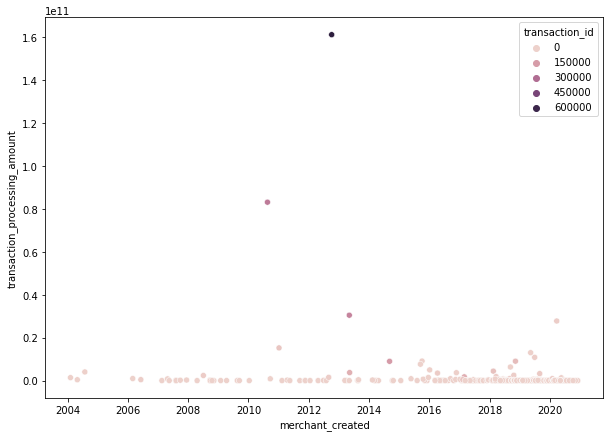

In [ ]:
#scatterplot of Age of Merchants vs Transaction Amount (Color is Number of Transactions):

plt.figure(figsize=(10,7))
sns.scatterplot(x= MerchAge['merchant_created'], y = MerchAge['transaction_processing_amount'], hue = MerchAge['transaction_id'])
plt.show()

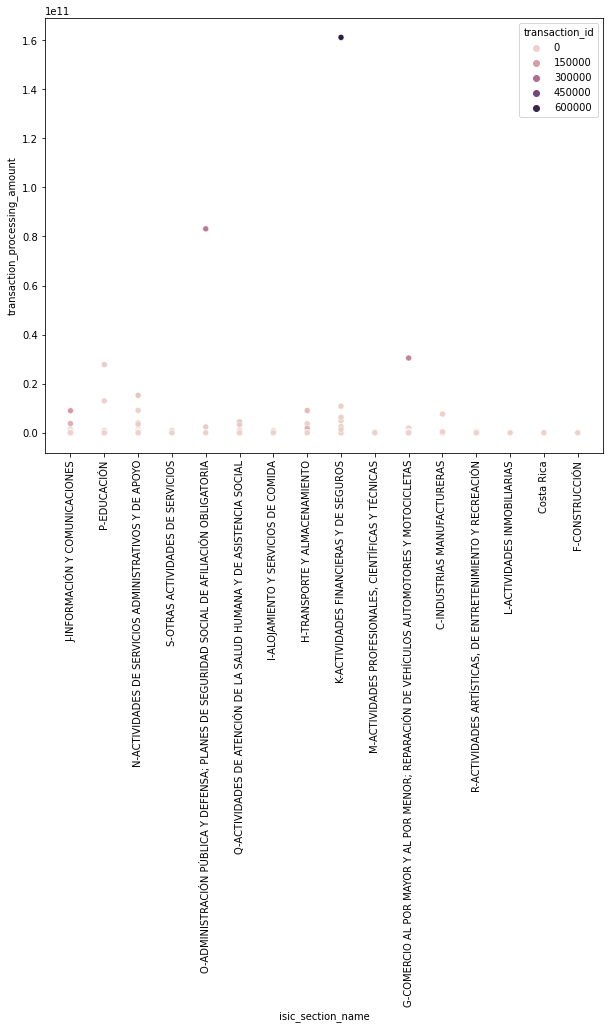

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= MerchAge['isic_section_name'], y = MerchAge['transaction_processing_amount'], hue = MerchAge['transaction_id'])
plt.xticks(rotation=90)
plt.show()

We can see that the majority of merchants have a very low number of transactions and consequently, very low amount of transactions. 

From the merchants that have a considerable number of transactions we can see something like the most older merchants have a higher volume of transactions. This should be expected due to the nature of the business of Placetopay: with time, the merchants with consolidated market have higher and higher customers.

And we can see also that some of the most lucrative clients (for placetopay platform) are into Finance, Insurance and Social Security, followed by Education, Entertainment and Administrative services 



In [ ]:
# Adding the rest of the categorical merchant attributes
MerchAge = pd.merge(MerchAge, 
                    bd[['isic_division_name', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['merchant_address_city', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['merchant_classification', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['merchant_enabled', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['site_category', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')
MerchAge = pd.merge(MerchAge, 
                    bd[['site_channel', "merchant_id"]].groupby(['merchant_id']).agg('last'),
                    how="left", left_on='merchant_id',right_on='merchant_id')

In [ ]:
MerchAge.columns

Index(['merchant_id', 'merchant_created', 'No of transactions',
       'Total Trans. Amount', 'isic_section_name', 'isic_division_name',
       'merchant_address_city', 'merchant_classification', 'merchant_enabled',
       'site_category', 'site_channel', 'Ret_January', 'Ret_February',
       'Ret_March', 'Ret_April', 'Ret_May', 'Ret_June', 'Ret_July',
       'Ret_August', 'Ret_September', 'Ret_October', 'Ret_November',
       'Ret_mean', 'Retention_class', 'Age', 'Mean Trans. Amount'],
      dtype='object')

## Customer Retention Rate

In [ ]:
MerchAge.shape

(571, 10)

In [ ]:
monthlist = bd.month.unique()

In [ ]:
%%time
# Calculate the retention coefficient for a single merchant, for all months
merch, month = 'CO0000001516', 8
Retentionlist = []
userlist0 = []
for month in monthlist:
  userlist = list(bd[(bd['merchant_id']==merch)&(bd['month']==month)].transaction_payer_id.unique())
  Retention =  len([user for user in userlist if user in userlist0])/(len(userlist0)+1)
  userlist0 = userlist
  Retentionlist.append(Retention)
len(Retentionlist)

CPU times: user 166 ms, sys: 6.55 ms, total: 173 ms
Wall time: 156 ms


In [ ]:
%%time
DFlist = []
for merch in MerchAge.index.to_list():
  Retentionlist = []
  userlist0 = []
  for month in monthlist:
    if month <12:
      userlist = list(bd[(bd['merchant_id']==merch)&(bd['month']==month)].transaction_payer_id.unique())
      Retention =  len([user for user in userlist if user in userlist0])/(len(userlist0)+1)
      userlist0 = userlist
      Retentionlist.append(Retention)
  DFlist.append(Retentionlist)

CPU times: user 1h 27min 19s, sys: 13.3 s, total: 1h 27min 33s
Wall time: 1h 26min 43s


In [ ]:
RetentionDF = pd.DataFrame(index=MerchAge.index, data=DFlist)
RetentionDF

0         1         2   ...        8         9         10
merchant_id                            ...                              
CO0000000009  0.0  0.082375  0.072600  ...  0.028664  0.039340  0.092279
CO0000000017  0.0  0.048786  0.078010  ...  0.033742  0.047211  0.061047
CO0000000024  0.0  0.377219  0.488204  ...  0.214248  0.198630  0.229766
CO0000000028  0.0  0.127660  0.188393  ...  0.061439  0.068696  0.094787
CO0000000046  0.0  0.119490  0.095806  ...  0.049593  0.060642  0.066366
...           ...       ...       ...  ...       ...       ...       ...
CO0000001734  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000
CO0000001739  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000
CO0000001752  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000
CO0000001797  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000
CO0000001822  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[571 rows x 11 columns]

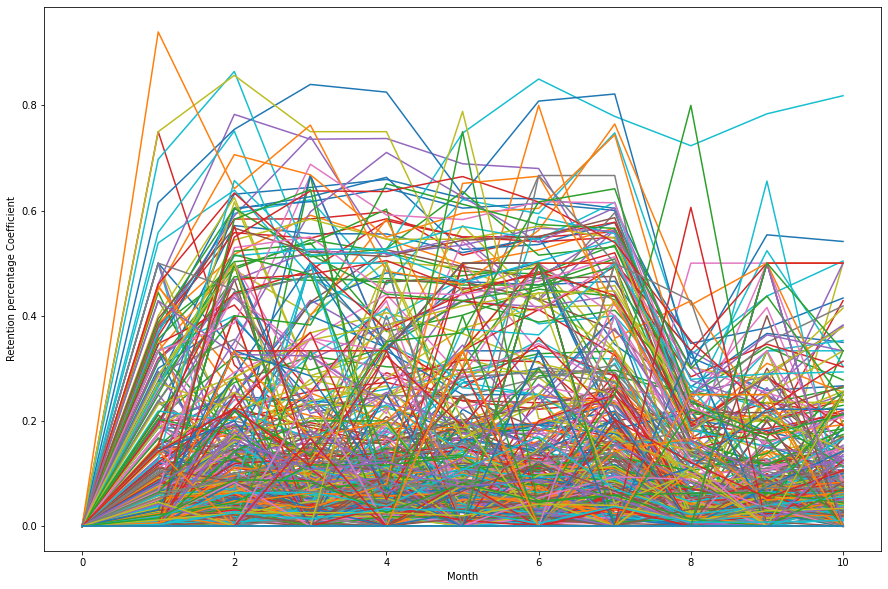

In [ ]:
# Plotting the retention coefficient:
plt.figure(figsize=(15, 10))
for merch in RetentionDF.index.to_list():
    plt.plot(RetentionDF.columns.to_list(),
             RetentionDF.loc[merch], 
            )
plt.xlabel('Month')
plt.ylabel('Retention percentage Coefficient')
plt.show()

In [ ]:
100*RetentionDF.loc['CO0000001516']

In [ ]:
for i in list(RetentionDF.columns):
    print('\n', i)
    print (RetentionDF[i].describe())


 0
count    571.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 0, dtype: float64

 1
count    571.000000
mean       0.074136
std        0.129789
min        0.000000
25%        0.000000
50%        0.011603
75%        0.090909
max        0.939759
Name: 1, dtype: float64

 2
count    571.000000
mean       0.114734
std        0.170866
min        0.000000
25%        0.000000
50%        0.043478
75%        0.144730
max        0.864567
Name: 2, dtype: float64

 3
count    571.000000
mean       0.105930
std        0.167506
min        0.000000
25%        0.000000
50%        0.034934
75%        0.125000
max        0.839892
Name: 3, dtype: float64

 4
count    571.000000
mean       0.107243
std        0.162589
min        0.000000
25%        0.000000
50%        0.038194
75%        0.130795
max        0.825214
Name: 4, dtype: float64

 5
count    571.000000
mean       0.112653
std        0.166973
min        0.000000
25%        0.000

In [ ]:
# DONT RUN
# Alternatively:
for month in monthlist:
  if month <12:
    Retentionlist = []
    for merch in MerchAge.index.to_list():
      userlist = list(bd[(bd['merchant_id']==merch)&(bd['month']==month)].transaction_payer_id.unique())
      userlist2 = list(bd[(bd['merchant_id']==merch)&(bd['month']==month+1)].transaction_payer_id.unique())
      Retention =  len([user for user in userlist2 if user in userlist])/(len(userlist)+1)
      Retentionlist.append(Retention)
    # convert retention rate to dataframe
    RetentionSeries = pd.Series(index=MerchAge.index, name=month, data=Retentionlist) #
    columnName = 'Retention-month-'+str(month)
    MerchAge[columnName] = RetentionSeries

In [ ]:
MerchAge = pd.merge(MerchAge, RetentionDF, how="left", left_on='merchant_id',right_on=RetentionDF.index)

In [ ]:
MerchAge.rename(columns = {0: 'Ret_January', 1: 'Ret_February',2: 'Ret_March',3: 'Ret_April',4: 'Ret_May',5: 'Ret_June',6: 'Ret_July',7: 'Ret_August',8: 'Ret_September',9: 'Ret_October',10: 'Ret_November'}, inplace = True)
MerchAge.columns

Index(['merchant_id', 'merchant_created', 'transaction_id', 'Money',
       'isic_section_name', 'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_January', 'Ret_February', 'Ret_March', 'Ret_April',
       'Ret_May', 'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September',
       'Ret_October', 'Ret_November'],
      dtype='object')

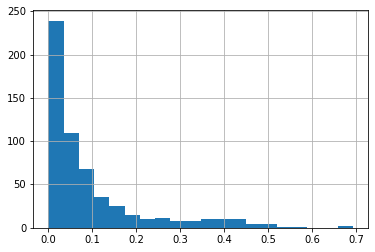

In [ ]:
MerchAge['Ret_mean'] = (MerchAge['Ret_January'] + MerchAge['Ret_February'] + MerchAge['Ret_March'] + MerchAge['Ret_April'] + 
                        MerchAge['Ret_May'] + MerchAge['Ret_June'] + MerchAge['Ret_July'] + MerchAge['Ret_August'] + MerchAge['Ret_September']+
                        MerchAge['Ret_October'] + MerchAge['Ret_November']
                        )/10
MerchAge['Ret_mean'].hist(bins = 20)

In [ ]:
PlotDF.iloc[0]['Ret_November']

0.09227871939736347

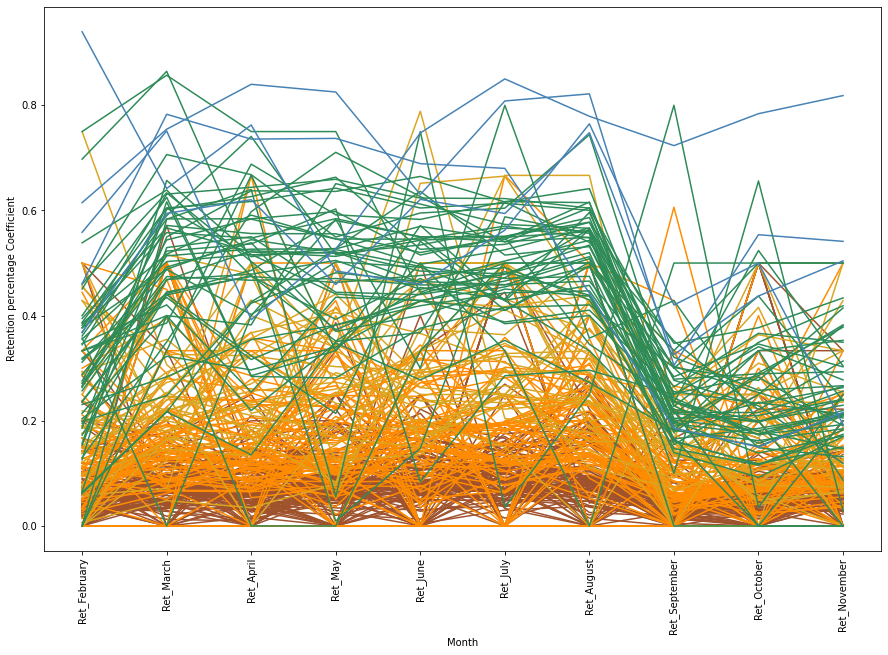

In [ ]:
# Plotting the retention coefficient:
PlotDF = MerchAge[['Ret_February', 'Ret_March', 'Ret_April',
       'Ret_May', 'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September',
       'Ret_October', 'Ret_November', 'Ret_mean']].copy()

#PlotDF.drop(PlotDF[PlotDF['Ret_mean']==0].index, inplace = True)
#PlotDF = PlotDF.transpose()
#PlotDF

color_dict = {'HIGH': 'b', 'MEDIUM':'g', 'LOW': 'y'}
#[color_dict[retclass] for retclass in PlotDF.Retention_class.unique()]

#for retclass in PlotDF.Retention_class.unique():
#  PlotDF2 = PlotDF[PlotDF['Retention_class'] == retclass]
#  color = color_dict[retclass]
    #plotlist = PlotDF2.iloc[merch] #.drop(columns=['Ret_mean','Retention_class'])
    #sns.lineplot(x=range(1,11,1), y = plotlist, hue =color_dict)#, hue=PlotDF.iloc[merch]['Ret_mean'])
    #fig = px.line(x=range(1,11,1), y=plotlist,)

plt.figure(figsize=(15, 10))

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.05)&(PlotDF['Ret_mean']<0.1)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'sienna')

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.1)&(PlotDF['Ret_mean']<0.2)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'darkorange')

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.2)&(PlotDF['Ret_mean']<0.3)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'goldenrod')

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.3)&(PlotDF['Ret_mean']<0.5)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'seagreen')

plotlist = PlotDF[PlotDF['Ret_mean']>=0.5].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  #print(plotlist.loc[merch])
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'steelblue')

plt.xlabel('Month')
plt.ylabel('Retention percentage Coefficient')
plt.xticks(rotation=90)
plt.show()

### Retention Rate calculated quarterly

In [ ]:
month = 0
userlist = list(bd[(bd['merchant_id']=='CO0000000024')&(bd['month'].isin([month, month+1,month+2]))].transaction_payer_id.unique())
len(userlist)

48724

In [ ]:
# calculate quarterly retention rate for only one merchant in order to estimate total time:

%%time
merch = 'CO0000000024'

userlist0 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([0, 1,2]))].transaction_payer_id.unique())
userlist1 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([3, 4, 5]))].transaction_payer_id.unique())
Retention1 =  len([user for user in userlist1 if user in userlist0])/(len(userlist0)+1)
userlist2 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([6, 7, 8]))].transaction_payer_id.unique())
Retention2 =  len([user for user in userlist2 if user in userlist1])/(len(userlist1)+1)
userlist3 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([9, 10, 11]))].transaction_payer_id.unique())
Retention3 =  len([user for user in userlist3 if user in userlist2])/(len(userlist2)+1)

Retentionlist = [Retention1, Retention2, Retention3]
Retentionlist

CPU times: user 3min 39s, sys: 1.67 ms, total: 3min 39s
Wall time: 3min 39s


In [ ]:
list(range(3,12,3))

[3, 6, 9]

In [ ]:
bd['merchant_id'] = bd['merchant_id'].astype(str)

In [ ]:
# Calculate retention rate per Quarter (trimester) 
# WARNING: This cell takes 2 hours
%%time
DFlist = []
for merch in MerchAge.merchant_id.to_list():
  Retentionlist = []
  month = 0
  userlist0 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([month, month+1, month+2]))].transaction_payer_id.unique())
  for month in range(3,12,3):
    userlist1 = list(bd[(bd['merchant_id']==merch)&(bd['month'].isin([month, month+1, month+2]))].transaction_payer_id.unique())
    Retention =  len([user for user in userlist1 if user in userlist0])/(len(userlist0)+1)
    userlist0 = userlist1
    Retentionlist.append(Retention)
  DFlist.append(Retentionlist)
  print(len(DFlist), merch)
RetentionQ = pd.DataFrame(index=MerchAge.index, data=DFlist)


In [ ]:
RetentionQ

0         1         2
0    0.149276  0.169588  0.073330
1    0.137848  0.132370  0.053940
2    0.672632  0.596481  0.309106
3    0.239752  0.321900  0.110497
4    0.080996  0.088191  0.092824
..        ...       ...       ...
566  0.000000  0.000000  0.000000
567  0.000000  0.000000  0.000000
568  0.000000  0.000000  0.000000
569  0.000000  0.000000  0.000000
570  0.000000  0.000000  0.000000

[571 rows x 3 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86ee53ed30>,
      dtype=object)

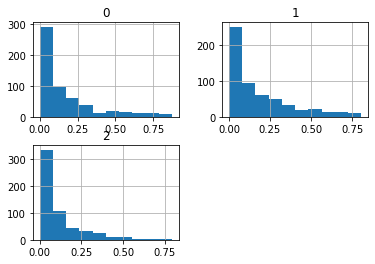

In [ ]:
RetentionQ.hist() #bins = 20

In [ ]:
RetentionQ
RetentionQ.rename(columns = {0: 'Retention_Q1', 1: 'Retention_Q2',2: 'Retention_Q3'}, inplace = True)

Index(['Retention_Q1', 'Retention_Q2', 'Retention_Q3'], dtype='object')

In [ ]:
MerchAge = pd.merge(MerchAge, RetentionQ, how="left", left_on=MerchAge.index, right_on=RetentionQ.index)

In [ ]:
MerchAge = MerchAge[['key_0', 'merchant_id', 'merchant_created', 'Age', 'No of transactions',
       'Mean Trans. Amount', 'Total Trans. Amount', 'isic_section_name',
       'isic_division_name', 'merchant_address_city', 'merchant_classification', 
       'merchant_enabled', 'site_category', 'site_channel',
       'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Ret_mean', 'Retention_class']]
MerchAge.columns

Index(['key_0', 'merchant_id', 'merchant_created', 'Age', 'No of transactions',
       'Mean Trans. Amount', 'Total Trans. Amount', 'isic_section_name',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Retention_Q1', 'Retention_Q2', 'Retention_Q3',
       'Ret_mean', 'Retention_class'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



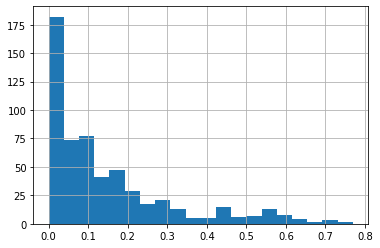

In [ ]:
MerchAge['Ret_mean'] = (MerchAge['Retention_Q1'] + MerchAge['Retention_Q2'] + MerchAge['Retention_Q3'])/3
MerchAge['Ret_mean'].hist(bins = 20)

In [ ]:
MerchAge['Retention_class'] = np.where(MerchAge["Ret_mean"] < 0.1, "LOW",
                                       np.where(MerchAge['Ret_mean'] > 0.4, 'HIGH','MEDIUM')) 
MerchAge.Retention_class.value_counts()

LOW       303
MEDIUM    205
HIGH       63
Name: Retention_class, dtype: int64

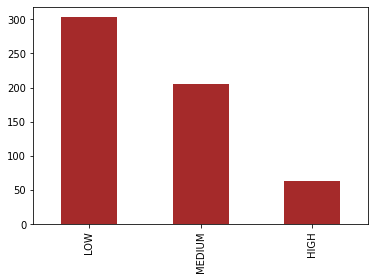

In [ ]:
MerchAge.Retention_class.value_counts().plot(kind='bar', color = 'brown')

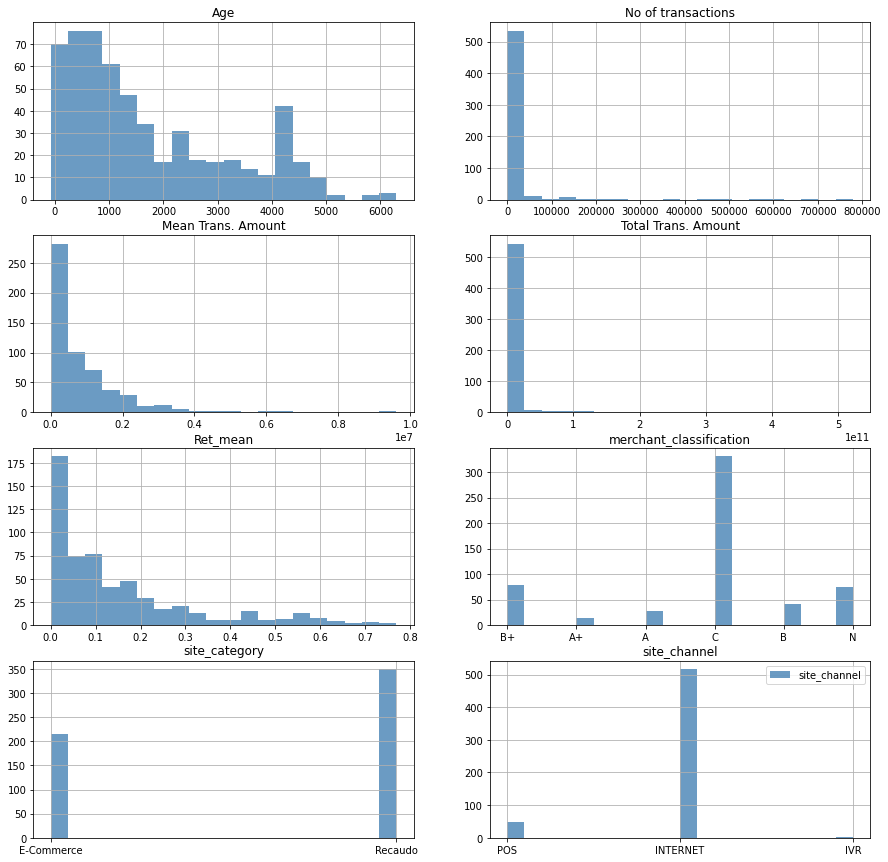

In [ ]:
#Frequency distributions of each new attributes of merchants

plt.figure(figsize=(15,15))
for i, column in enumerate(['Age', 'No of transactions', 'Mean Trans. Amount', 'Total Trans. Amount', 'Ret_mean', 'merchant_classification', 'site_category', 'site_channel']):
  plt.subplot(4, 2, i+1)
  MerchAge[column].hist(bins = 20, alpha = 0.8, color = 'steelblue' , label = column).set_title(column)

plt.legend()
plt.show()


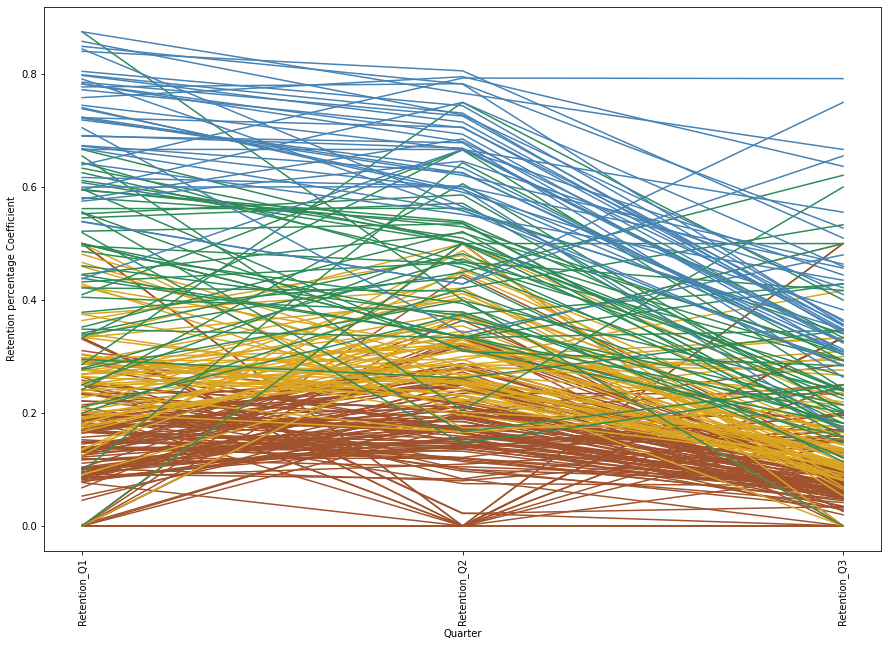

In [ ]:
# Plotting the retention coefficient:
PlotDF = MerchAge[['Retention_Q1', 'Retention_Q2', 'Retention_Q3',
       'Ret_mean']].copy()
plt.figure(figsize=(15, 10))

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.1)&(PlotDF['Ret_mean']<0.2)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'sienna')

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.2)&(PlotDF['Ret_mean']<0.3)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'goldenrod')

plotlist = PlotDF[(PlotDF['Ret_mean']>=0.3)&(PlotDF['Ret_mean']<0.5)].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'seagreen')

plotlist = PlotDF[PlotDF['Ret_mean']>=0.5].drop(columns=['Ret_mean'])
for merch in plotlist.index:
  plt.plot(plotlist.columns.to_list(), plotlist.loc[merch], color = 'steelblue')

plt.xlabel('Quarter')
plt.ylabel('Retention percentage Coefficient')
#plt.xticks(rotation=90)
plt.show()

In [9]:
PlotDF = MerchAge[['Retention_Q1', 'Retention_Q2', 'Retention_Q3',
       'Ret_mean']].copy()
PlotDF[(PlotDF['Ret_mean']>=0.1)&(PlotDF['Ret_mean']<0.2)].drop(columns=['Ret_mean']).mean()

Retention_Q1    0.146521
Retention_Q2    0.175996
Retention_Q3    0.107220
dtype: float64

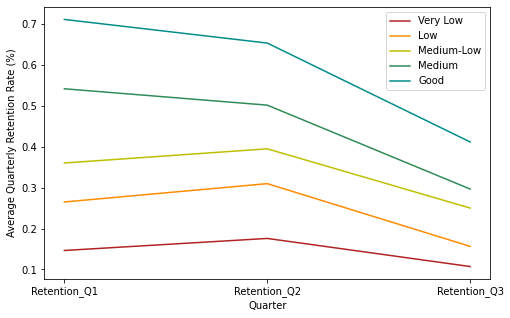

In [26]:
# Plotting the average retention coefficient in every group:
plt.figure(figsize=(8, 5))
plt.plot(PlotDF[(PlotDF['Ret_mean']>=0.1)&(PlotDF['Ret_mean']<0.2)].drop(columns=['Ret_mean']).mean(), color = 'firebrick', label = 'Very Low')
plt.plot(PlotDF[(PlotDF['Ret_mean']>=0.2)&(PlotDF['Ret_mean']<0.3)].drop(columns=['Ret_mean']).mean(), color = 'darkorange', label = 'Low')
plt.plot(PlotDF[(PlotDF['Ret_mean']>=0.3)&(PlotDF['Ret_mean']<0.4)].drop(columns=['Ret_mean']).mean(), color = 'y', label = 'Medium-Low')
plt.plot(PlotDF[(PlotDF['Ret_mean']>=0.4)&(PlotDF['Ret_mean']<0.5)].drop(columns=['Ret_mean']).mean(), color = 'seagreen', label = 'Medium')
plt.plot(PlotDF[(PlotDF['Ret_mean']>=0.5)&(PlotDF['Ret_mean']<0.9)].drop(columns=['Ret_mean']).mean(), color = 'darkcyan', label = 'Good')
plt.xlabel('Quarter')
plt.ylabel('Average Quarterly Retention Rate (%)')
plt.legend()#['First', 'Second’], loc=4)
plt.show()

In [28]:
#Which business are improving their retention rate?
len(MerchAge[MerchAge['Retention_Q3'] > MerchAge['Retention_Q2']]

key_0   merchant_id merchant_created  ...  Retention_class  age  cluster
4        4  CO0000000046       2004-07-27  ...              LOW   16        1
7        7  CO0000000121       2007-08-05  ...           MEDIUM   13        4
8        8  CO0000000122       2007-08-05  ...           MEDIUM   13        6
13      13  CO0000000155       2007-09-27  ...           MEDIUM   13        3
44      44  CO0000000287       2008-12-31  ...              LOW   12        1
..     ...           ...              ...  ...              ...  ...      ...
537    537  CO0000001668       2020-05-15  ...              LOW    0        5
539    539  CO0000001671       2020-05-20  ...           MEDIUM    0       -1
543    543  CO0000001675       2020-05-26  ...           MEDIUM    0        5
553    553  CO0000001693       2020-06-19  ...              LOW    0        6
560    560  CO0000001716       2020-07-22  ...              LOW    0        6

[110 rows x 21 columns]

In [31]:
plot_df = {'Always better': len(MerchAge[(MerchAge['Retention_Q2'] > MerchAge['Retention_Q1'])&(MerchAge['Retention_Q3'] > MerchAge['Retention_Q2'])]),
                        'Getting better': len(MerchAge[(MerchAge['Retention_Q1'] > MerchAge['Retention_Q2'])&(MerchAge['Retention_Q3'] > MerchAge['Retention_Q2'])]),
                        'Getting bad': len(MerchAge[(MerchAge['Retention_Q2'] > MerchAge['Retention_Q1'])&(MerchAge['Retention_Q2'] > MerchAge['Retention_Q3'])]),
                        'Going bad': len(MerchAge[(MerchAge['Retention_Q1'] > MerchAge['Retention_Q2'])&(MerchAge['Retention_Q2'] > MerchAge['Retention_Q3'])])
                        }
plot_df

{'Always better': 34,
 'Getting bad': 193,
 'Getting better': 57,
 'Going bad': 133}

# Final Remarks



# Save Database Adjustments

In [ ]:
bd['isic_division_name'] = bd['isic_division_name'].str.replace('\.0-','-')

In [ ]:
len(bd['isic_division_name'].unique())

51

In [ ]:
bd.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_processing_amount',
       'transaction_card_issuer_name', 'transaction_card_type',
       'transaction_card_installments', 'transaction_response_code', 'site_id',
       'site_channel', 'site_category', 'merchant_id', 'merchant_enabled',
       'merchant_address_city', 'merchant_created', 'merchant_classification',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_name', 'paymentmethod_franchise', 'paymentmethod_type',
       'isic_division_name', 'isic_section_name'],
      dtype='object')

In [ ]:
bd['paymentmethod_franchise'].value_counts().tail(50)

VISA          146269
MASTERCARD    108916
AMEX           14701
DINERS          2607
Name: paymentmethod_franchise, dtype: int64

In [ ]:
bd.shape

(9738799, 32)

In [ ]:
pwd

'/content'

In [ ]:
#/content/drive/My Drive/Colab Notebooks

In [ ]:
cd '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks'

/content/drive/.shortcut-targets-by-id/10MASVkGpMyb9HT3ebm8hX6hVuck-_WDW/Place to pay - DS4A


In [ ]:
ls

 1-Documentos/                    merchants.ftr
'2-Deliverable Documents Sent'/   payers.csv
'3- EDA Notebooks'/               payers.ftr
'Base Limpia .ipynb'              payers.gsheet
 bdfnv2.csv                       placetopayDB4.csv
 deanonimized_documents.csv       placetopayDB4.ftr
 EDA.ipynb                        placetopayDB4_pickle
'Luis Hernando'/                  placetopayDB4_sample.csv
 mechants_clustering.csv          placetopayDB4_sample.ftr
'merchants (1).gsheet'            PlaceToPayEDA.html
 merchants.csv


In [ ]:
%%time
# To save as Pickle format (in Jupyter):
bd.to_pickle("./placetopayDB4_pickle")

CPU times: user 14.7 s, sys: 8.42 s, total: 23.1 s
Wall time: 27.1 s


In [ ]:
%%time
# https://medium.com/@yugdamor/solved-your-session-crashed-after-using-all-available-ram-google-colab-e31f6a192d52
# To save as Pickle format (in Colab):
filename = "./placetopayDB4_pickle"
outfile = open(filename,'wb')

pickle.dump(bd,outfile)
outfile.close()

In [ ]:
%%time
# $ pip install feather-format
import feather

feather.write_dataframe(SampleBD, "./placetopayDB4_sample.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

CPU times: user 1.16 s, sys: 372 ms, total: 1.53 s
Wall time: 2.18 s


In [ ]:
%%time
bd.to_csv('placetopayDB4.csv', header=True, index=False)

CPU times: user 3min 16s, sys: 3.51 s, total: 3min 20s
Wall time: 4min 29s


In [ ]:
ls

drive/  sample_data/


In [ ]:
SampleBD = bd.sample(frac =.10) 
SampleBD.shape

(984970, 32)

In [ ]:
SampleBD.to_csv('placetopayDB4_sample.csv', header=True, index=False)

In [ ]:
SampleBD.head()

transaction_user_agent  ...                                  isic_section_name
3215478  Mozilla/5.0 (iPhone; CPU iPhone OS 13_4_1 like...  ...  G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARA...
3373075                                               None  ...             K-ACTIVIDADES FINANCIERAS Y DE SEGUROS
5004549  Mozilla/5.0 (Linux; Android 10; SM-G975F) Appl...  ...  O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE ...
5512223  Mozilla/5.0 (Linux; Android 9; SM-A705MN) Appl...  ...             K-ACTIVIDADES FINANCIERAS Y DE SEGUROS
2792318  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  ...             K-ACTIVIDADES FINANCIERAS Y DE SEGUROS

[5 rows x 32 columns]

# Save Merchant Attributes and Payer Attributes


In [ ]:
MerchAge = MerchAge[['merchant_id', 'merchant_created', 'Age', 'No of transactions',
       'Mean Trans. Amount','Total Trans. Amount', 'isic_section_name', 'isic_division_name',
       'merchant_address_city', 'merchant_classification', 'merchant_enabled',
       'site_category', 'site_channel', 'Ret_January', 'Ret_February',
       'Ret_March', 'Ret_April', 'Ret_May', 'Ret_June', 'Ret_July',
       'Ret_August', 'Ret_September', 'Ret_October', 'Ret_November',
       'Ret_mean', 'Retention_class']] 
PayerAge.rename(columns = {'Money':'AvgSpent'}, inplace = True)       

In [4]:
cd '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks'

/content/drive/.shortcut-targets-by-id/10MASVkGpMyb9HT3ebm8hX6hVuck-_WDW/Place to pay - DS4A


In [5]:
ls

 1-Documentos/                    payers_cluster.csv
'2-Deliverable Documents Sent'/   payers.csv
'3- Notebooks'/                   payers.ftr
'4 - Presentaciones'/             payers.gsheet
 bdfnv2.csv                       placetopayDB4.csv
 deanonimized_documents.csv       placetopayDB4.ftr
 mechants_clustering.csv          placetopayDB4_pickle
 merchants_cluster.csv            placetopayDB4_sample.csv
 merchants.csv                    placetopayDB4_sample.ftr
 merchants.ftr                    ptp-infraestructure.drawio
 merchants.gsheet                 transaction_descriptions.csv


In [ ]:
%%time
PayerAge.to_csv('payers.csv', header=True, index=False)

CPU times: user 18.1 s, sys: 747 ms, total: 18.8 s
Wall time: 20.9 s


In [ ]:
%%time
MerchAge.to_csv('merchants.csv', header=True, index=False)

CPU times: user 14.3 ms, sys: 998 µs, total: 15.3 ms
Wall time: 24.6 ms


In [ ]:
%%time
# $ pip install feather-format
import feather

feather.write_dataframe(PayerAge, "./payers.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

CPU times: user 3.65 ms, sys: 6 µs, total: 3.66 ms
Wall time: 11.3 ms


In [ ]:
feather.write_dataframe(MerchAge, "./merchants.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

In [6]:
# to restart working:

PayerAge = pd.read_csv('payers.csv')
MerchAge = pd.read_csv('merchants.csv')

In [ ]:
MerchAge.columns

Index(['merchant_id', 'merchant_created', 'Age', 'No of transactions',
       'Mean Trans. Amount', 'Total Trans. Amount', 'isic_section_name',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_January', 'Ret_February', 'Ret_March', 'Ret_April',
       'Ret_May', 'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September',
       'Ret_October', 'Ret_November', 'Ret_mean', 'Retention_class'],
      dtype='object')

In [ ]:
PayerAge.columns

Index(['transaction_payer_id', 'Purchases', 'TotalSpent', 'AvgSpent',
       'FirstPurchase', 'LastPurchase', 'recency', 'frequency',
       'transaction_payer_document_type', 'ip_location_region_name',
       'ip_location_city', 'transaction_user_agent'],
      dtype='object')